# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

C:\Users\happygeon\AppData\Local\Temp\ipykernel_18696\577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [4]:
# Q1
df.head()


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [5]:
# Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50791 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  longitude

In [11]:
#Q2
missing_values = df.isnull().sum()

# 결측치가 많은 순으로 정렬
missing_info = pd.DataFrame({
    'missing_num': missing_values[missing_values > 0],
    'missing_%': (missing_values / len(df)) * 100
}).sort_values(by='missing_num', ascending=False)

# 결측치가 0개인 컬럼은 제외
missing_info = missing_info[missing_info['missing_num'] > 0]
missing_info

,missing_num,missing_%
jurisdiction_names,50781,99.970470
license,50759,99.927160
square_feet,50407,99.234192
monthly_price,46119,90.792582
weekly_price,45411,89.398772
host_response_rate,19006,37.416332
host_response_time,19006,37.416332
security_deposit,17325,34.107016
host_acceptance_rate,14015,27.590755
review_scores_value,11482,22.604142


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

C:\Users\happygeon\AppData\Local\Temp\ipykernel_18696\1879189678.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_info['missing_%'], palette=color_palette)


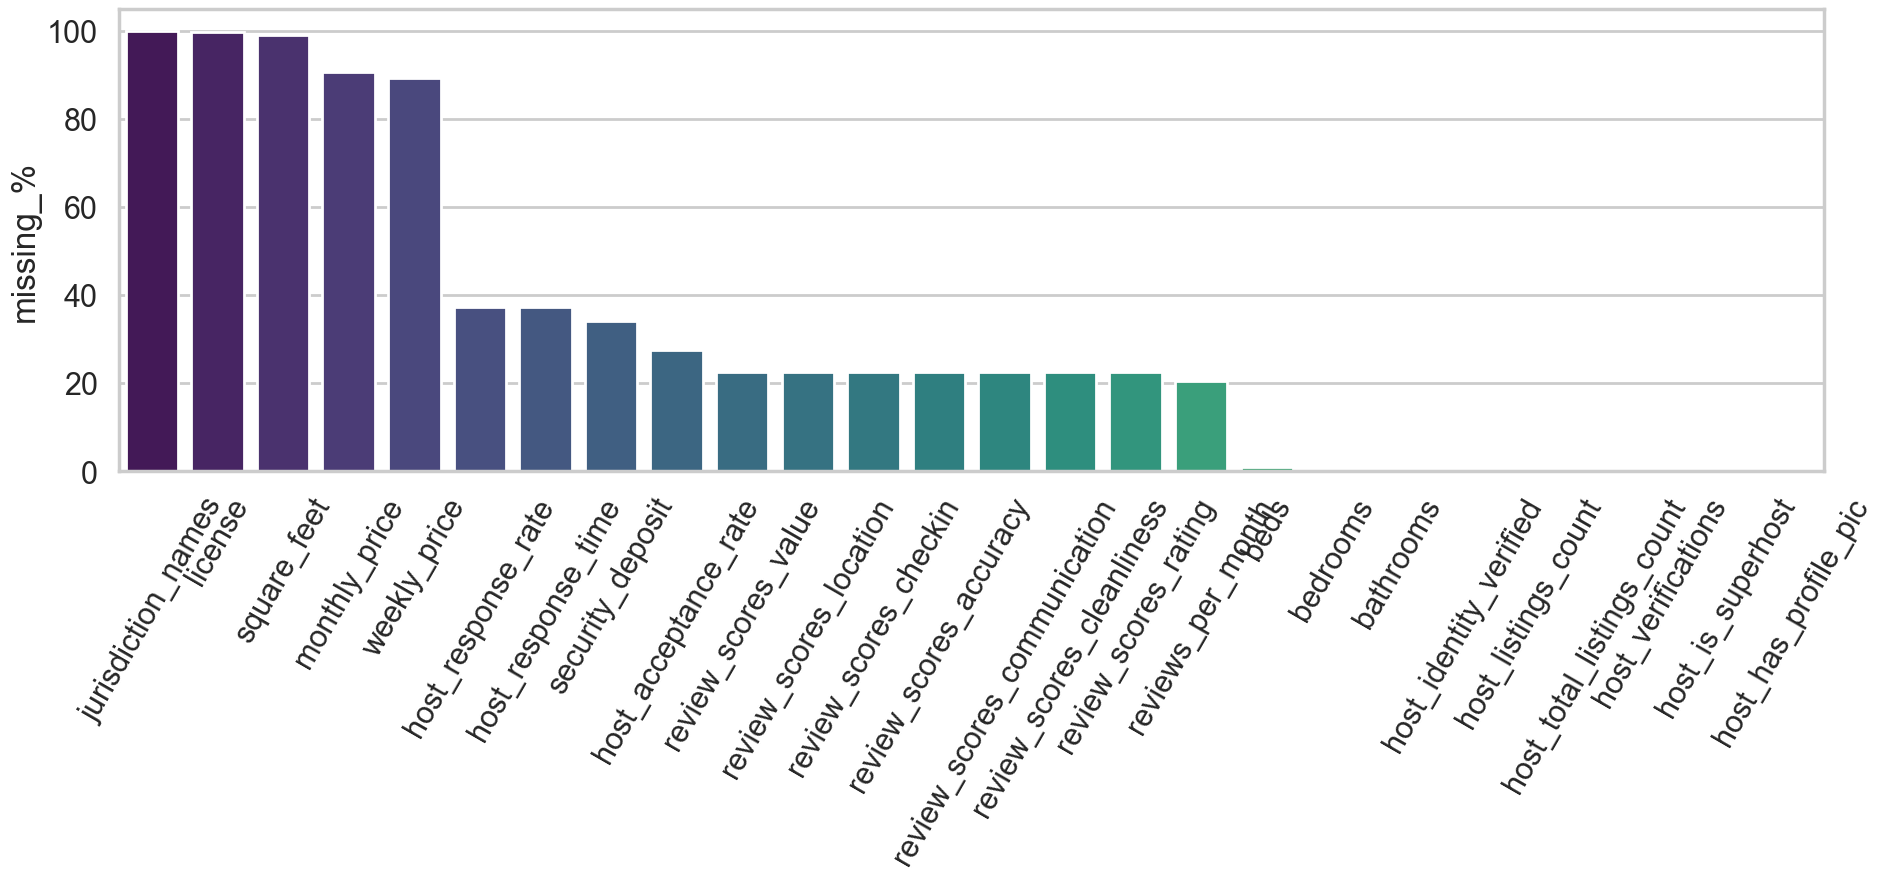

In [30]:
# Q3
plt.figure(figsize=(22, 6))
sns.set_theme(context='poster', style='whitegrid')
color_palette = sns.color_palette("viridis", len(missing_info))
sns.barplot(data=missing_info['missing_%'], palette=color_palette)
plt.xticks(rotation=60)
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [31]:
# Q4

df[df['beds'].isnull()].head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [32]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [33]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50791 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room_type

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

C:\Users\happygeon\AppData\Local\Temp\ipykernel_18696\2800440898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette='viridis')


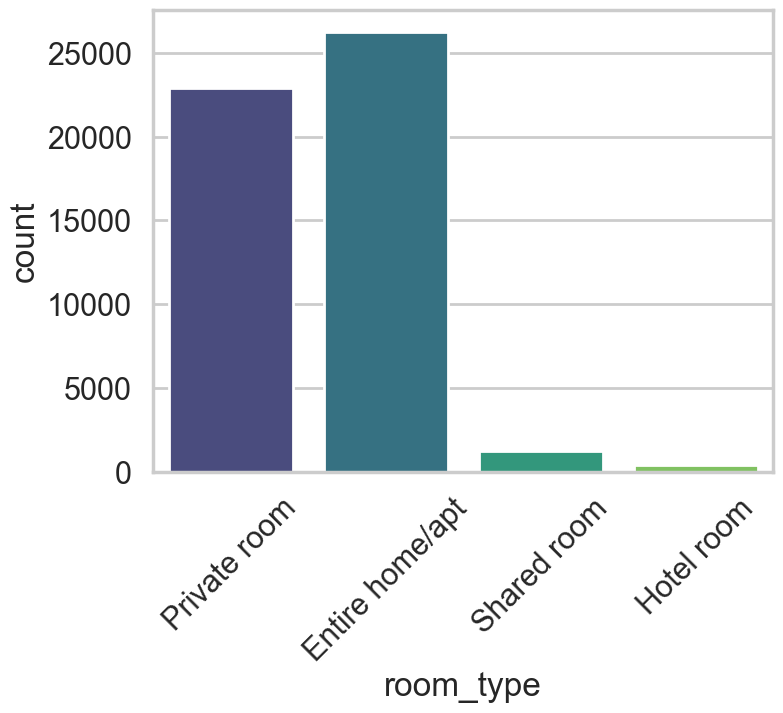

In [48]:
# Q5
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df, palette='viridis')
plt.xticks(rotation=45)  # x 라벨 기울이기
plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

C:\Users\happygeon\AppData\Local\Temp\ipykernel_18696\4181865686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=(df['room_type'].value_counts() / total).index,


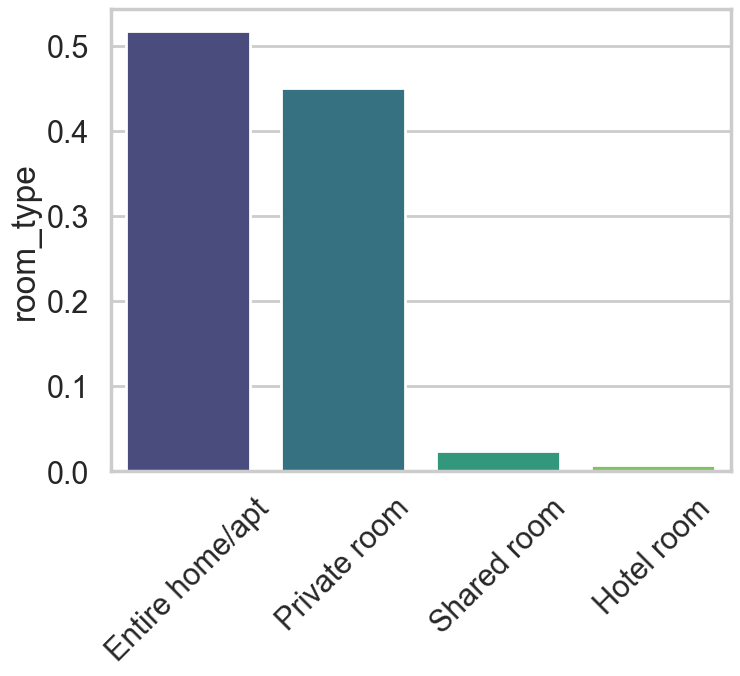

In [51]:
plt.figure(figsize=(8, 6))
total = float(len(df['room_type']))
ax = sns.barplot(x=(df['room_type'].value_counts() / total).index, 
                 y=(df['room_type'].value_counts() / total).values, palette='viridis')
plt.xticks(rotation=45) 
ax.set(ylabel='room_type', xlabel='')
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

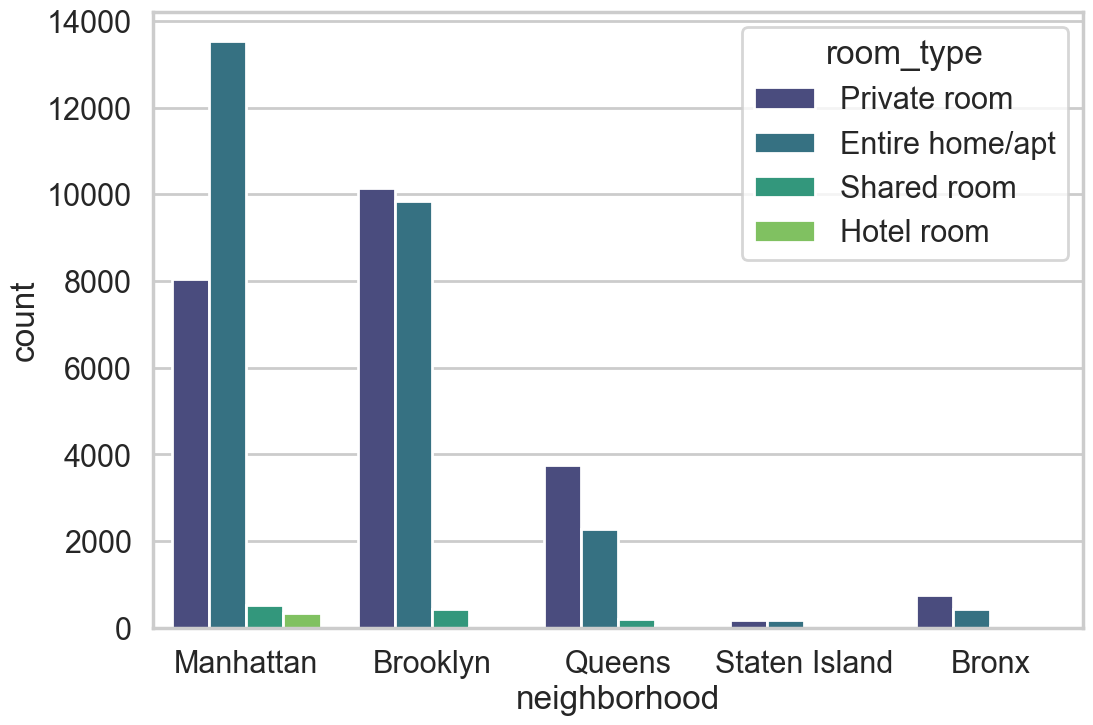

In [53]:
# Q7
plt.figure(figsize=(12, 8))
sns.countplot(x='neighborhood', hue='room_type', data=df, palette='viridis')
plt.legend(title='room_type', loc='upper right')
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

C:\Users\happygeon\AppData\Local\Temp\ipykernel_18696\2604828273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='neighborhood', y='price', data=df, palette='viridis')


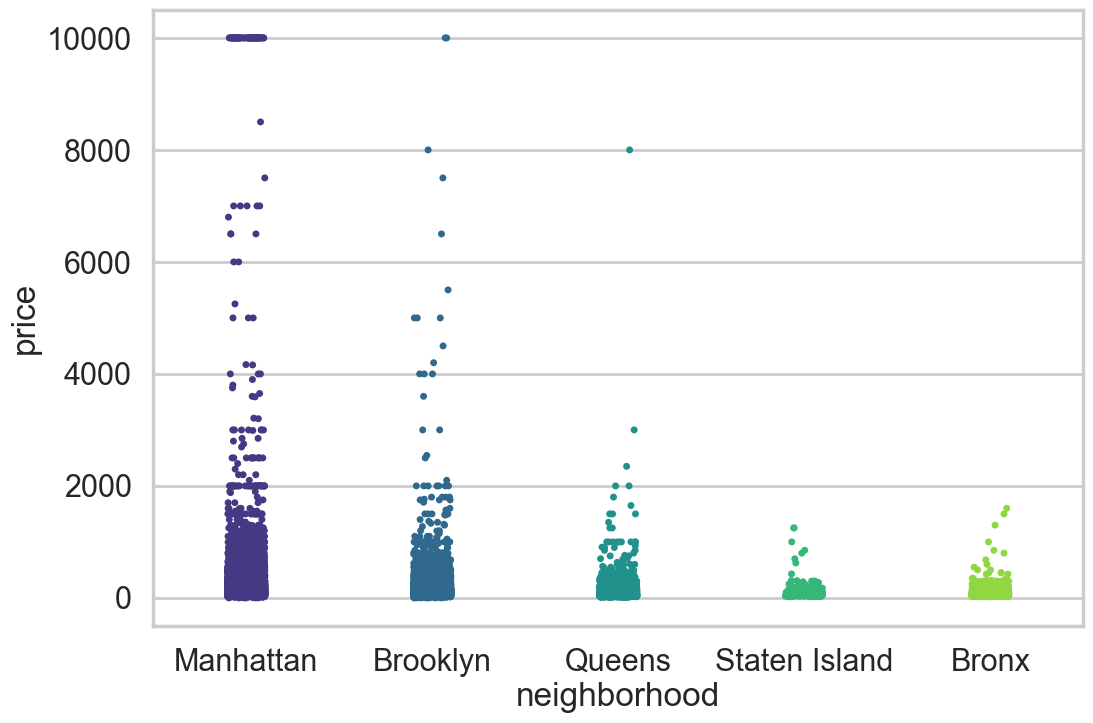

In [56]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize=(12, 8))
sns.stripplot(x='neighborhood', y='price', data=df, palette='viridis')

plt.show()

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [59]:
# Q9
# Ststen Island, Bronx는 전체 room_type의 개수가 적어 분석하기 어렵다. 그러나
# Manhattan, Brooklyn, Queens는 순서대로 private room의 비율은 점차 늘어나고, entire home/apt의 비율은 점차 줄어든다.
# 이 셋 중 가장 entire home/apt의 비율이 높은 Manhattan은 전반적인 가격의 분포가 높으며
# 이 셋 중 가장 entire home/apt의 비율이 낮은 Queens는 전반적인 가격의 분포가 낮다.


---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

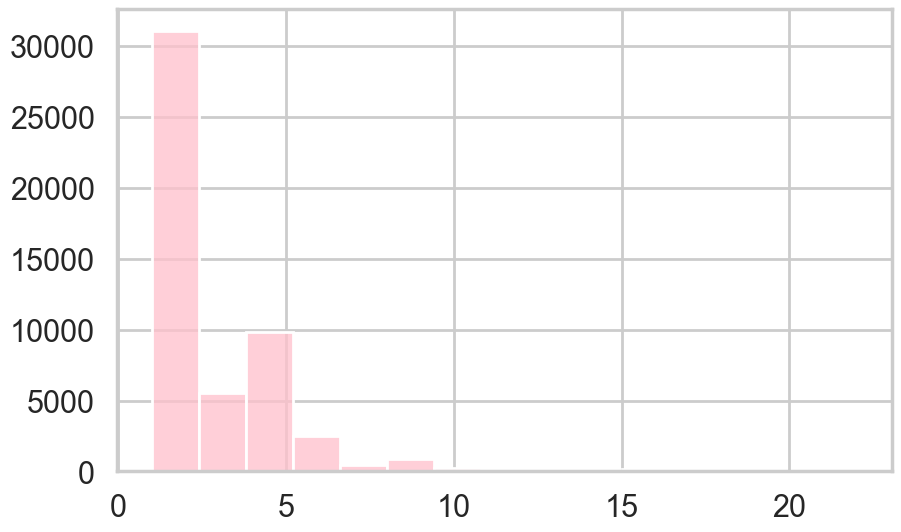

In [78]:
# Q10
plt.figure(figsize=(10, 6))
sns.histplot(df['accommodates'], bins=15, color='pink')
plt.ylabel('')
plt.xlabel('')
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

10000


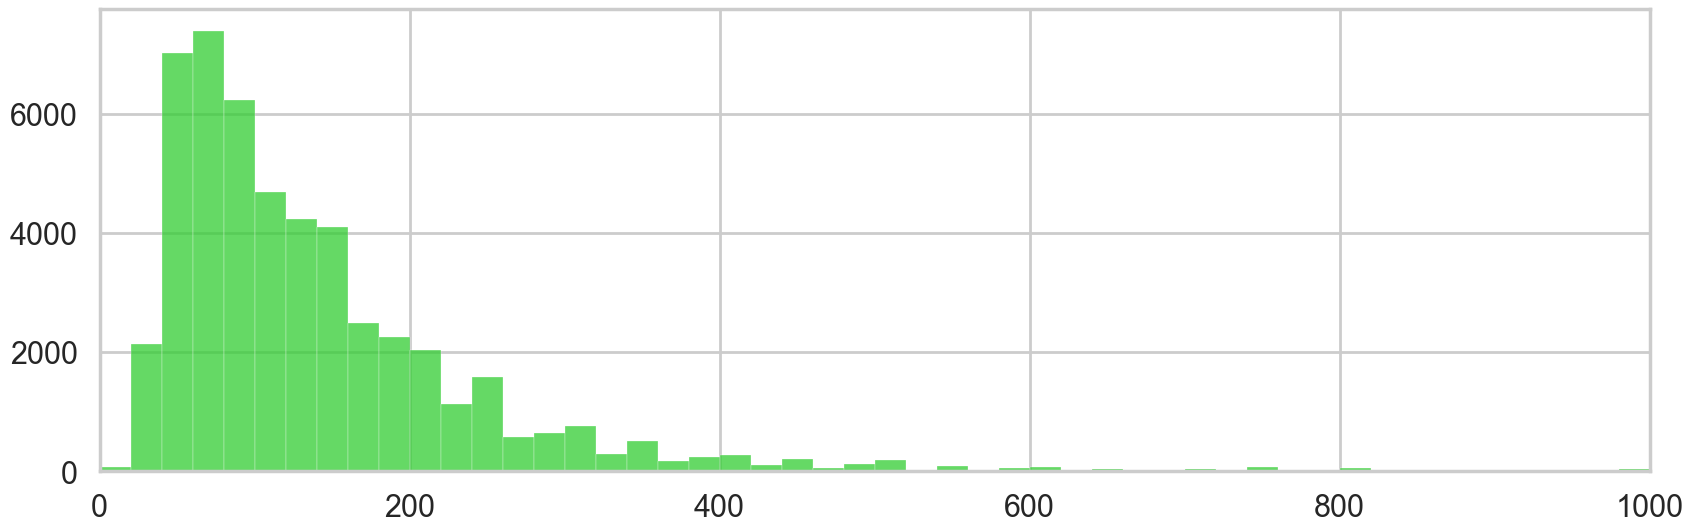

In [95]:
# Q11
print(max(df['price']))
plt.figure(figsize=(20, 6))
sns.histplot(df['price'], bins=500,  color='limegreen')
plt.xlim(0, 1000)  # x 축 범위 설정
plt.ylabel('')
plt.xlabel('')
plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [112]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

C:\Users\happygeon\AppData\Local\Temp\ipykernel_18696\577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [113]:
# 각 열(column)별로 결측치 비율 및 중앙값 계산
missing_percentage = df.isnull().mean()
column_medians = df.apply(lambda col: col[col.apply(lambda x: isinstance(x, (int, float)))].median())

# 25% 이상인 열은 삭제
columns_to_drop = missing_percentage[missing_percentage >= 0.25].index
df = df.drop(columns=columns_to_drop)

# 10% 이상 25% 미만인 행은 삭제
rows_to_drop = missing_percentage[(missing_percentage >= 0.10) & (missing_percentage < 0.25)].index
df = df.dropna(subset=rows_to_drop)

# 10% 미만인 열은 중앙값으로 대체
columns_to_fill_median = missing_percentage[missing_percentage < 0.10].index
for col in columns_to_fill_median:
    if df[col].dtype in [np.number]:  # 숫자형 데이터인 경우에만 중앙값으로 대체
        df[col].fillna(column_medians[col], inplace=True)

# 결과 출력
df.info()

c:\Users\happygeon\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\happygeon\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\happygeon\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\happygeon\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\happygeon\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepd

<class 'pandas.core.frame.DataFrame'>
Index: 39291 entries, 1 to 50694
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39291 non-null  int64  
 1   host_is_superhost                 39290 non-null  object 
 2   host_listings_count               39291 non-null  float64
 3   host_total_listings_count         39291 non-null  float64
 4   host_verifications                39290 non-null  object 
 5   host_has_profile_pic              39290 non-null  object 
 6   host_identity_verified            39290 non-null  object 
 7   neighborhood                      39291 non-null  object 
 8   latitude                          39291 non-null  float64
 9   longitude                         39291 non-null  float64
 10  is_location_exact                 39291 non-null  object 
 11  property_type                     39291 non-null  object 
 12  room_type

c:\Users\happygeon\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\happygeon\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\happygeon\AppData\Local\Temp\ipykernel_18696\4208077176.py:16: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype in [np.number]:  # 숫자형 데이터인 경우에만 중앙값으로 대체


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [114]:
#Q13-1)

df = pd.get_dummies(df, columns=['room_type'], prefix='room_type')
df.info()
# 앞서 분석한 것 과 같이 room_type에 따라 cost에 변화가 있음을 예상할 수 있었고, 따라서 범주형 데이터를 원-핫 인코딩을 통해 수치형 데이터로 변환하였다.

<class 'pandas.core.frame.DataFrame'>
Index: 39291 entries, 1 to 50694
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39291 non-null  int64  
 1   host_is_superhost                 39290 non-null  object 
 2   host_listings_count               39291 non-null  float64
 3   host_total_listings_count         39291 non-null  float64
 4   host_verifications                39290 non-null  object 
 5   host_has_profile_pic              39290 non-null  object 
 6   host_identity_verified            39290 non-null  object 
 7   neighborhood                      39291 non-null  object 
 8   latitude                          39291 non-null  float64
 9   longitude                         39291 non-null  float64
 10  is_location_exact                 39291 non-null  object 
 11  property_type                     39291 non-null  object 
 12  accommoda

In [117]:
#Q13-2)
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaler = mm_scaler.fit_transform(df['latitude'].values.reshape(-1,1))
df['latitude'] = mm_scaler
mm_scaler = MinMaxScaler()
mm_scaler = mm_scaler.fit_transform(df['longitude'].values.reshape(-1,1))
df['longitude'] = mm_scaler
df.head()
# 위도와 경도는 각 데이터 별로 큰 차이가 없다.(각각 40, -70 주변의 값) 따라서 MinMaxScaler를 통해 0~1 사이의 값으로 변환하였다.

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,0.609501,0.486059,...,f,f,strict_14_with_grace_period,t,t,0.38,True,False,False,False
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,0.439097,0.531630,...,f,f,moderate,f,f,4.71,True,False,False,False
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,0.594695,0.502705,...,f,f,moderate,t,t,0.59,True,False,False,False
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,0.523602,0.473475,...,f,f,strict_14_with_grace_period,f,f,0.56,False,False,True,False
5,5121,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,Brooklyn,0.443427,0.538843,...,f,f,strict_14_with_grace_period,f,f,0.38,False,False,True,False


In [118]:
#Q13-3)
df = pd.get_dummies(df, columns=['neighborhood'], prefix='neighborhoode')
df.info()
# room_type과 마찬가지로 neighborhood도 범주형 데이터이므로 원-핫 인코딩을 통해 수치형 데이터로 변환하였다.

<class 'pandas.core.frame.DataFrame'>
Index: 39291 entries, 1 to 50694
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39291 non-null  int64  
 1   host_is_superhost                 39290 non-null  object 
 2   host_listings_count               39291 non-null  float64
 3   host_total_listings_count         39291 non-null  float64
 4   host_verifications                39290 non-null  object 
 5   host_has_profile_pic              39290 non-null  object 
 6   host_identity_verified            39290 non-null  object 
 7   latitude                          39291 non-null  float64
 8   longitude                         39291 non-null  float64
 9   is_location_exact                 39291 non-null  object 
 10  property_type                     39291 non-null  object 
 11  accommodates                      39291 non-null  int64  
 12  bathrooms

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
